# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of meta details about the movies and tv shows as genre.
Also details about Users activities, spent duration and if watching in High definition or standard definition.
You have to analyse this dataset to find top insights, findings and to solve the four tasks assigned to you.

In [18]:
dataframe = pd.read_csv("/content/stc TV Data Set_T1.csv") #i convert it to CSV because xlsb extinction gave me an error
# Please make a copy of dataset if you are going to work directly and make changes on the dataset

df=dataframe.copy()

df.head() #to display the first 5 rows

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0.0,0.0,100 treets
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0.0,1.0,Moana
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0.0,1.0,The Mermaid Princess
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0.0,1.0,The Mermaid Princess
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0.0,1.0,Churchill


In [19]:
# check the data shape
dataframe.shape

(772528, 13)

In [20]:
# display the first 5 rows
dataframe.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0.0,0.0,100 treets
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0.0,1.0,Moana
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0.0,1.0,The Mermaid Princess
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0.0,1.0,The Mermaid Princess
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0.0,1.0,Churchill


In [21]:
# Data Preprocessing on the input data
dataframe = dataframe.drop(columns=['Column1'])         # dropping the index column
dataframe['program_name'] = dataframe['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
dataframe['date_'] = pd.to_datetime(dataframe['date_']) # read date column as date data type "i changed this line becuse the previous one gave me error"
dataframe[['duration_seconds', 'season','episode','series_title','hd']] = dataframe[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

In [22]:
# display the dataset after applying data types
dataframe.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0.0,0.0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0.0,1.0,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0.0,1.0,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0.0,1.0,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0.0,1.0,Churchill


In [23]:
# describe the numeric values in the dataset
dataframe.describe()

,duration_seconds,season,episode,series_title,hd
count,7.725280e+05,772528.000000,772528.000000,772527.000000,772527.000000
mean,1.265985e+03,1.301300,5.885460,0.011840,0.394171
std,7.353937e+03,2.081368,12.006876,0.108167,0.488672
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+01,0.000000,0.000000,0.000000,0.000000
50%,1.070000e+02,1.000000,1.000000,0.000000,0.000000
75%,1.329000e+03,1.000000,9.000000,0.000000,1.000000
max,1.461329e+06,23.000000,282.000000,1.000000,1.000000


In [24]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title         True
hd                   True
original_name       False
dtype: bool

# Task 1
##### You are required to work on task one to study and HD flag for available dataset

In [25]:
# make a copy of the dataframe for working on task 1
df=dataframe.copy()

Unique values and their frequencies in the 'HD' column:
0.0    468019
1.0    304508
Name: hd, dtype: int64


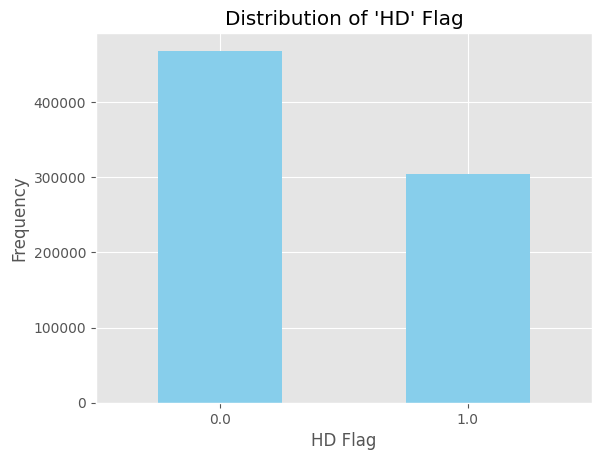

In [30]:
# Task One: Study the 'HD' flag in the dataset

# Check unique values and their frequencies in the 'HD' column
hd_flag_counts = dataframe['hd'].value_counts()

# Display the unique values and their frequencies
print("Unique values and their frequencies in the 'HD' column:")
print(hd_flag_counts)

# Plot a bar chart to visualize the distribution of 'HD' flag
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('ggplot')

# Plot the bar chart
hd_flag_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of 'HD' Flag")
plt.xlabel("HD Flag")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


In [26]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [27]:
# show the result
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,2645,17528,2331.851667
1,The Amazing pider-Man,MOVIE,780,2096,1503.833889
2,The Expendables,MOVIE,659,1666,1386.350833
3,Moana,MOVIE,1717,6179,1341.222500
4,Trolls,MOVIE,2041,11072,1266.652778
5,Bean,MOVIE,740,2783,1070.385000
6,The murfs,MOVIE,679,2477,1053.231944
7,Hotel Transylvania,MOVIE,395,1417,843.825556
8,Cloudy With a Chance of Meatballs,MOVIE,531,1588,689.365833
9,The Man With The Iron Fists,MOVIE,554,1885,672.820556


In [28]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [29]:
# plot top 10 Programs
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [31]:
# Here we try to study the customer experience against Program class
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [32]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3088,399490,190266.656944
1,MOVIE,8983,373038,81402.572222


In [33]:
# plot the total watch time against total number of users and report your findings
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

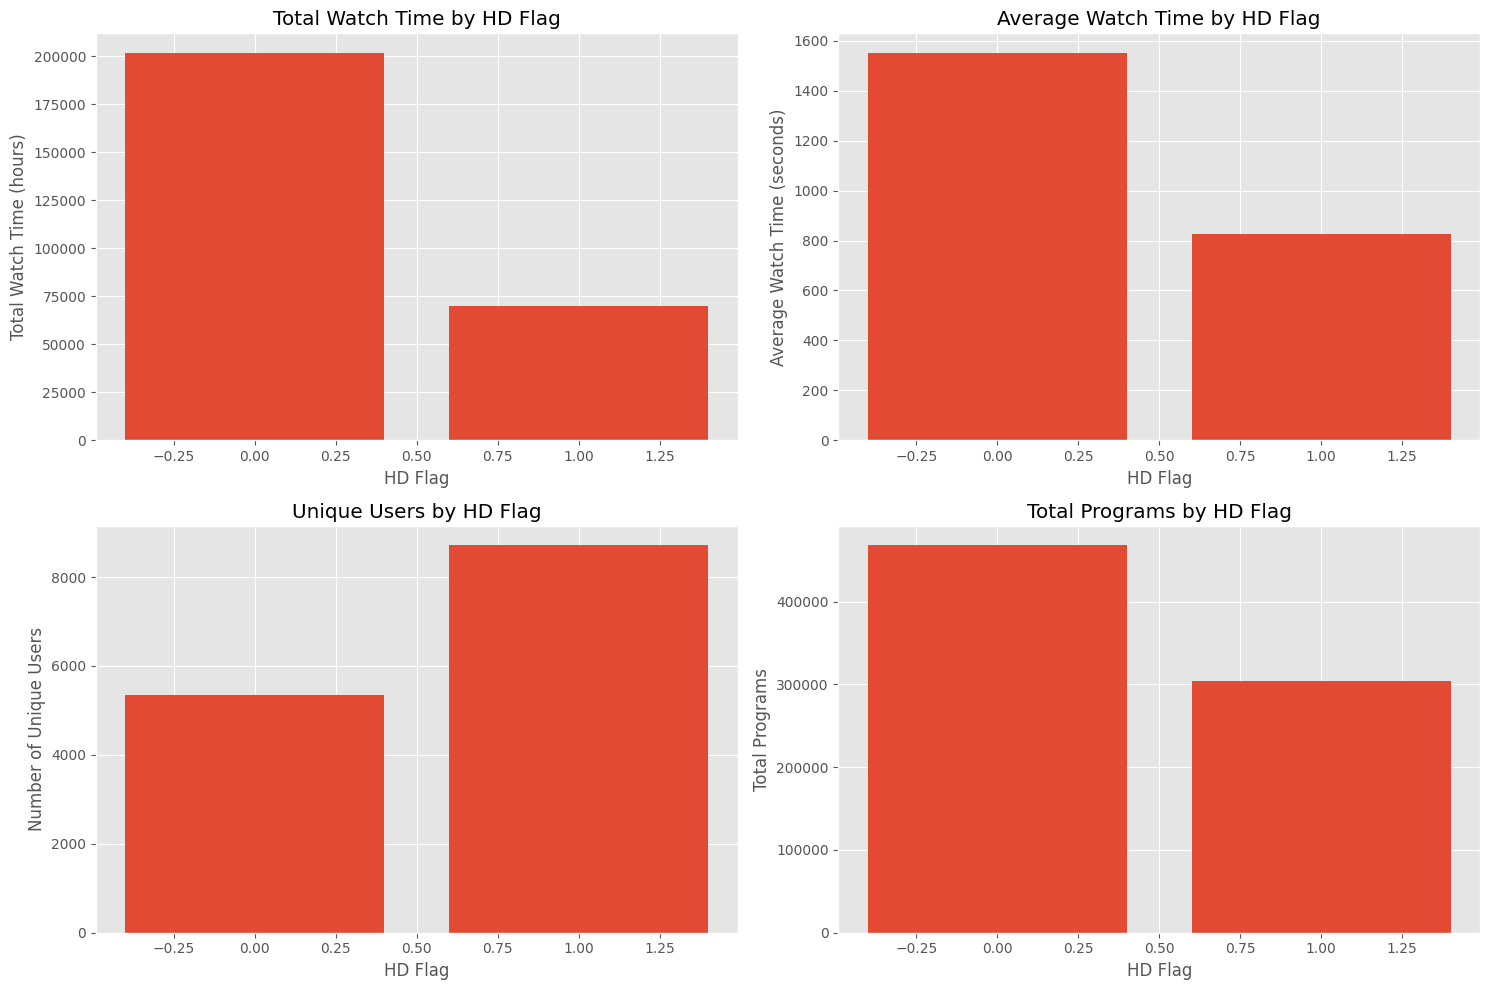

'\nThis code will generate four bar plots showing the relationship between user behavior and the HD flag. The plots include total watch time,\naverage watch time, number of unique users, and total programs watched, with each plot separated by HD and non-HD content.\n'

In [34]:
"""
TODO study the relation and user's behaviour Against HD flag, feel free to include any comparison
"""
'''
To study the relationship and user behavior against the HD flag,
we can analyze various aspects such as the total watch time, number of users watching HD vs.
non-HD content, and user engagement metrics.
'''

# Grouping the data based on the HD flag
hd_grouped = df.groupby('hd').agg({
    'user_id_maped': [('unique_users', 'nunique')],
    'duration_seconds': [('total_watch_time', 'sum'), ('average_watch_time', 'mean')],
    'program_class': [('total_programs', 'count')]
}).reset_index()

hd_grouped.columns = ['HD Flag', 'Unique Users', 'Total Watch Time (seconds)', 'Average Watch Time (seconds)', 'Total Programs']

# Converting total watch time to hours for better readability
hd_grouped['Total Watch Time (hours)'] = hd_grouped['Total Watch Time (seconds)'] / 3600

# Plotting the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot total watch time
axes[0, 0].bar(hd_grouped['HD Flag'], hd_grouped['Total Watch Time (hours)'])
axes[0, 0].set_title('Total Watch Time by HD Flag')
axes[0, 0].set_xlabel('HD Flag')
axes[0, 0].set_ylabel('Total Watch Time (hours)')

# Plot average watch time
axes[0, 1].bar(hd_grouped['HD Flag'], hd_grouped['Average Watch Time (seconds)'])
axes[0, 1].set_title('Average Watch Time by HD Flag')
axes[0, 1].set_xlabel('HD Flag')
axes[0, 1].set_ylabel('Average Watch Time (seconds)')

# Plot total number of unique users
axes[1, 0].bar(hd_grouped['HD Flag'], hd_grouped['Unique Users'])
axes[1, 0].set_title('Unique Users by HD Flag')
axes[1, 0].set_xlabel('HD Flag')
axes[1, 0].set_ylabel('Number of Unique Users')

# Plot total number of programs
axes[1, 1].bar(hd_grouped['HD Flag'], hd_grouped['Total Programs'])
axes[1, 1].set_title('Total Programs by HD Flag')
axes[1, 1].set_xlabel('HD Flag')
axes[1, 1].set_ylabel('Total Programs')

plt.tight_layout()
plt.show()

'''
This code will generate four bar plots showing the relationship between user behavior and the HD flag. The plots include total watch time,
average watch time, number of unique users, and total programs watched, with each plot separated by HD and non-HD content.
'''